In [1]:
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import helpers_global
import cv2

Initial Map:
Map with optimal path


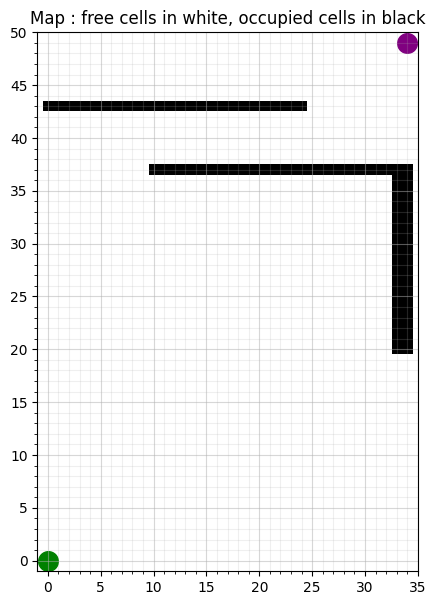

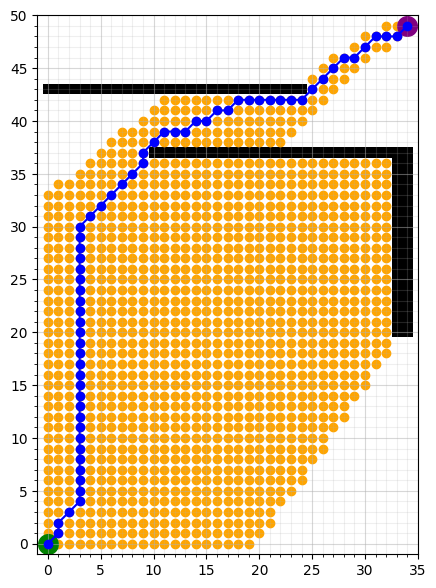

In [2]:
start =(0,0)
goal = (34,49)

data = np.zeros((35, 50))

occupancy_grid = data.copy()
occupancy_grid[0:25, 6]=1
occupancy_grid[33:35, 12:30]=1
occupancy_grid[10:33, 12]=1



path = helpers_global.global_final(occupancy_grid, start, goal, "8N", True)



In [3]:
path

[(0, 0),
 (1, 1),
 (1, 2),
 (3, 4),
 (3, 30),
 (9, 36),
 (9, 37),
 (11, 39),
 (13, 39),
 (14, 40),
 (15, 40),
 (16, 41),
 (17, 41),
 (18, 42),
 (24, 42),
 (28, 46),
 (29, 46),
 (31, 48),
 (33, 48),
 (34, 49)]

In [ ]:
def next_checkpoint(path):
    if len(path) < 2:
        return []

    points_changement_direction = [path[0]]

    for i in range(1, len(path)-1):
        x1, y1 = path[i-1]
        x2, y2 = path[i]
        x3, y3 = path[i+1]

        pente1 = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else float('inf')
        pente2 = (y3 - y2) / (x3 - x2) if (x3 - x2) != 0 else float('inf')

        if pente1 != pente2:
            points_changement_direction.append(path[i])

    points_changement_direction.append(path[-1])

    return points_changement_direction



In [4]:
np.array(path)

array([[ 0,  0],
       [ 1,  1],
       [ 1,  2],
       [ 3,  4],
       [ 3, 30],
       [ 9, 36],
       [ 9, 37],
       [11, 39],
       [13, 39],
       [14, 40],
       [15, 40],
       [16, 41],
       [17, 41],
       [18, 42],
       [24, 42],
       [28, 46],
       [29, 46],
       [31, 48],
       [33, 48],
       [34, 49]])

In [4]:
def next_checkpoint(path, position_idx):
    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]

        if (x1, y1) == position_idx:
            return path[i+1]

        if (x1 <= position_idx[0] <= x2 or x1 >= position_idx[0] >= x2) and \
           (y1 <= position_idx[1] <= y2 or y1 >= position_idx[1] >= y2):
            return path[i+1]

    return None  


In [4]:
x = helpers_global.next_checkpoint(path, (3,25))
x

(3, 30)

In [6]:
path

[(0, 0),
 (1, 1),
 (1, 2),
 (3, 4),
 (3, 30),
 (9, 36),
 (9, 37),
 (11, 39),
 (13, 39),
 (14, 40),
 (15, 40),
 (16, 41),
 (17, 41),
 (18, 42),
 (24, 42),
 (28, 46),
 (29, 46),
 (31, 48),
 (33, 48),
 (34, 49)]